In [1]:
import yt
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.animation as animation
import numpy as np
import os
import functions

yt : [INFO     ] 2024-06-28 16:25:20,715 Parameters: current_time              = 20.0
yt : [INFO     ] 2024-06-28 16:25:20,720 Parameters: domain_dimensions         = [512 512   1]
yt : [INFO     ] 2024-06-28 16:25:20,722 Parameters: domain_left_edge          = [-1. -1.  0.]
yt : [INFO     ] 2024-06-28 16:25:20,724 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2024-06-28 16:25:22,216 Parameters: current_time              = 20.0
yt : [INFO     ] 2024-06-28 16:25:22,217 Parameters: domain_dimensions         = [512 512   1]
yt : [INFO     ] 2024-06-28 16:25:22,217 Parameters: domain_left_edge          = [-1. -1.  0.]
yt : [INFO     ] 2024-06-28 16:25:22,218 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2024-06-28 16:25:22,857 Parameters: current_time              = 20.0
yt : [INFO     ] 2024-06-28 16:25:22,858 Parameters: domain_dimensions         = [512 512   1]
yt : [INFO     ] 2024-06-28 16:25:22,858 Parameters: domain_left_edge          = [-

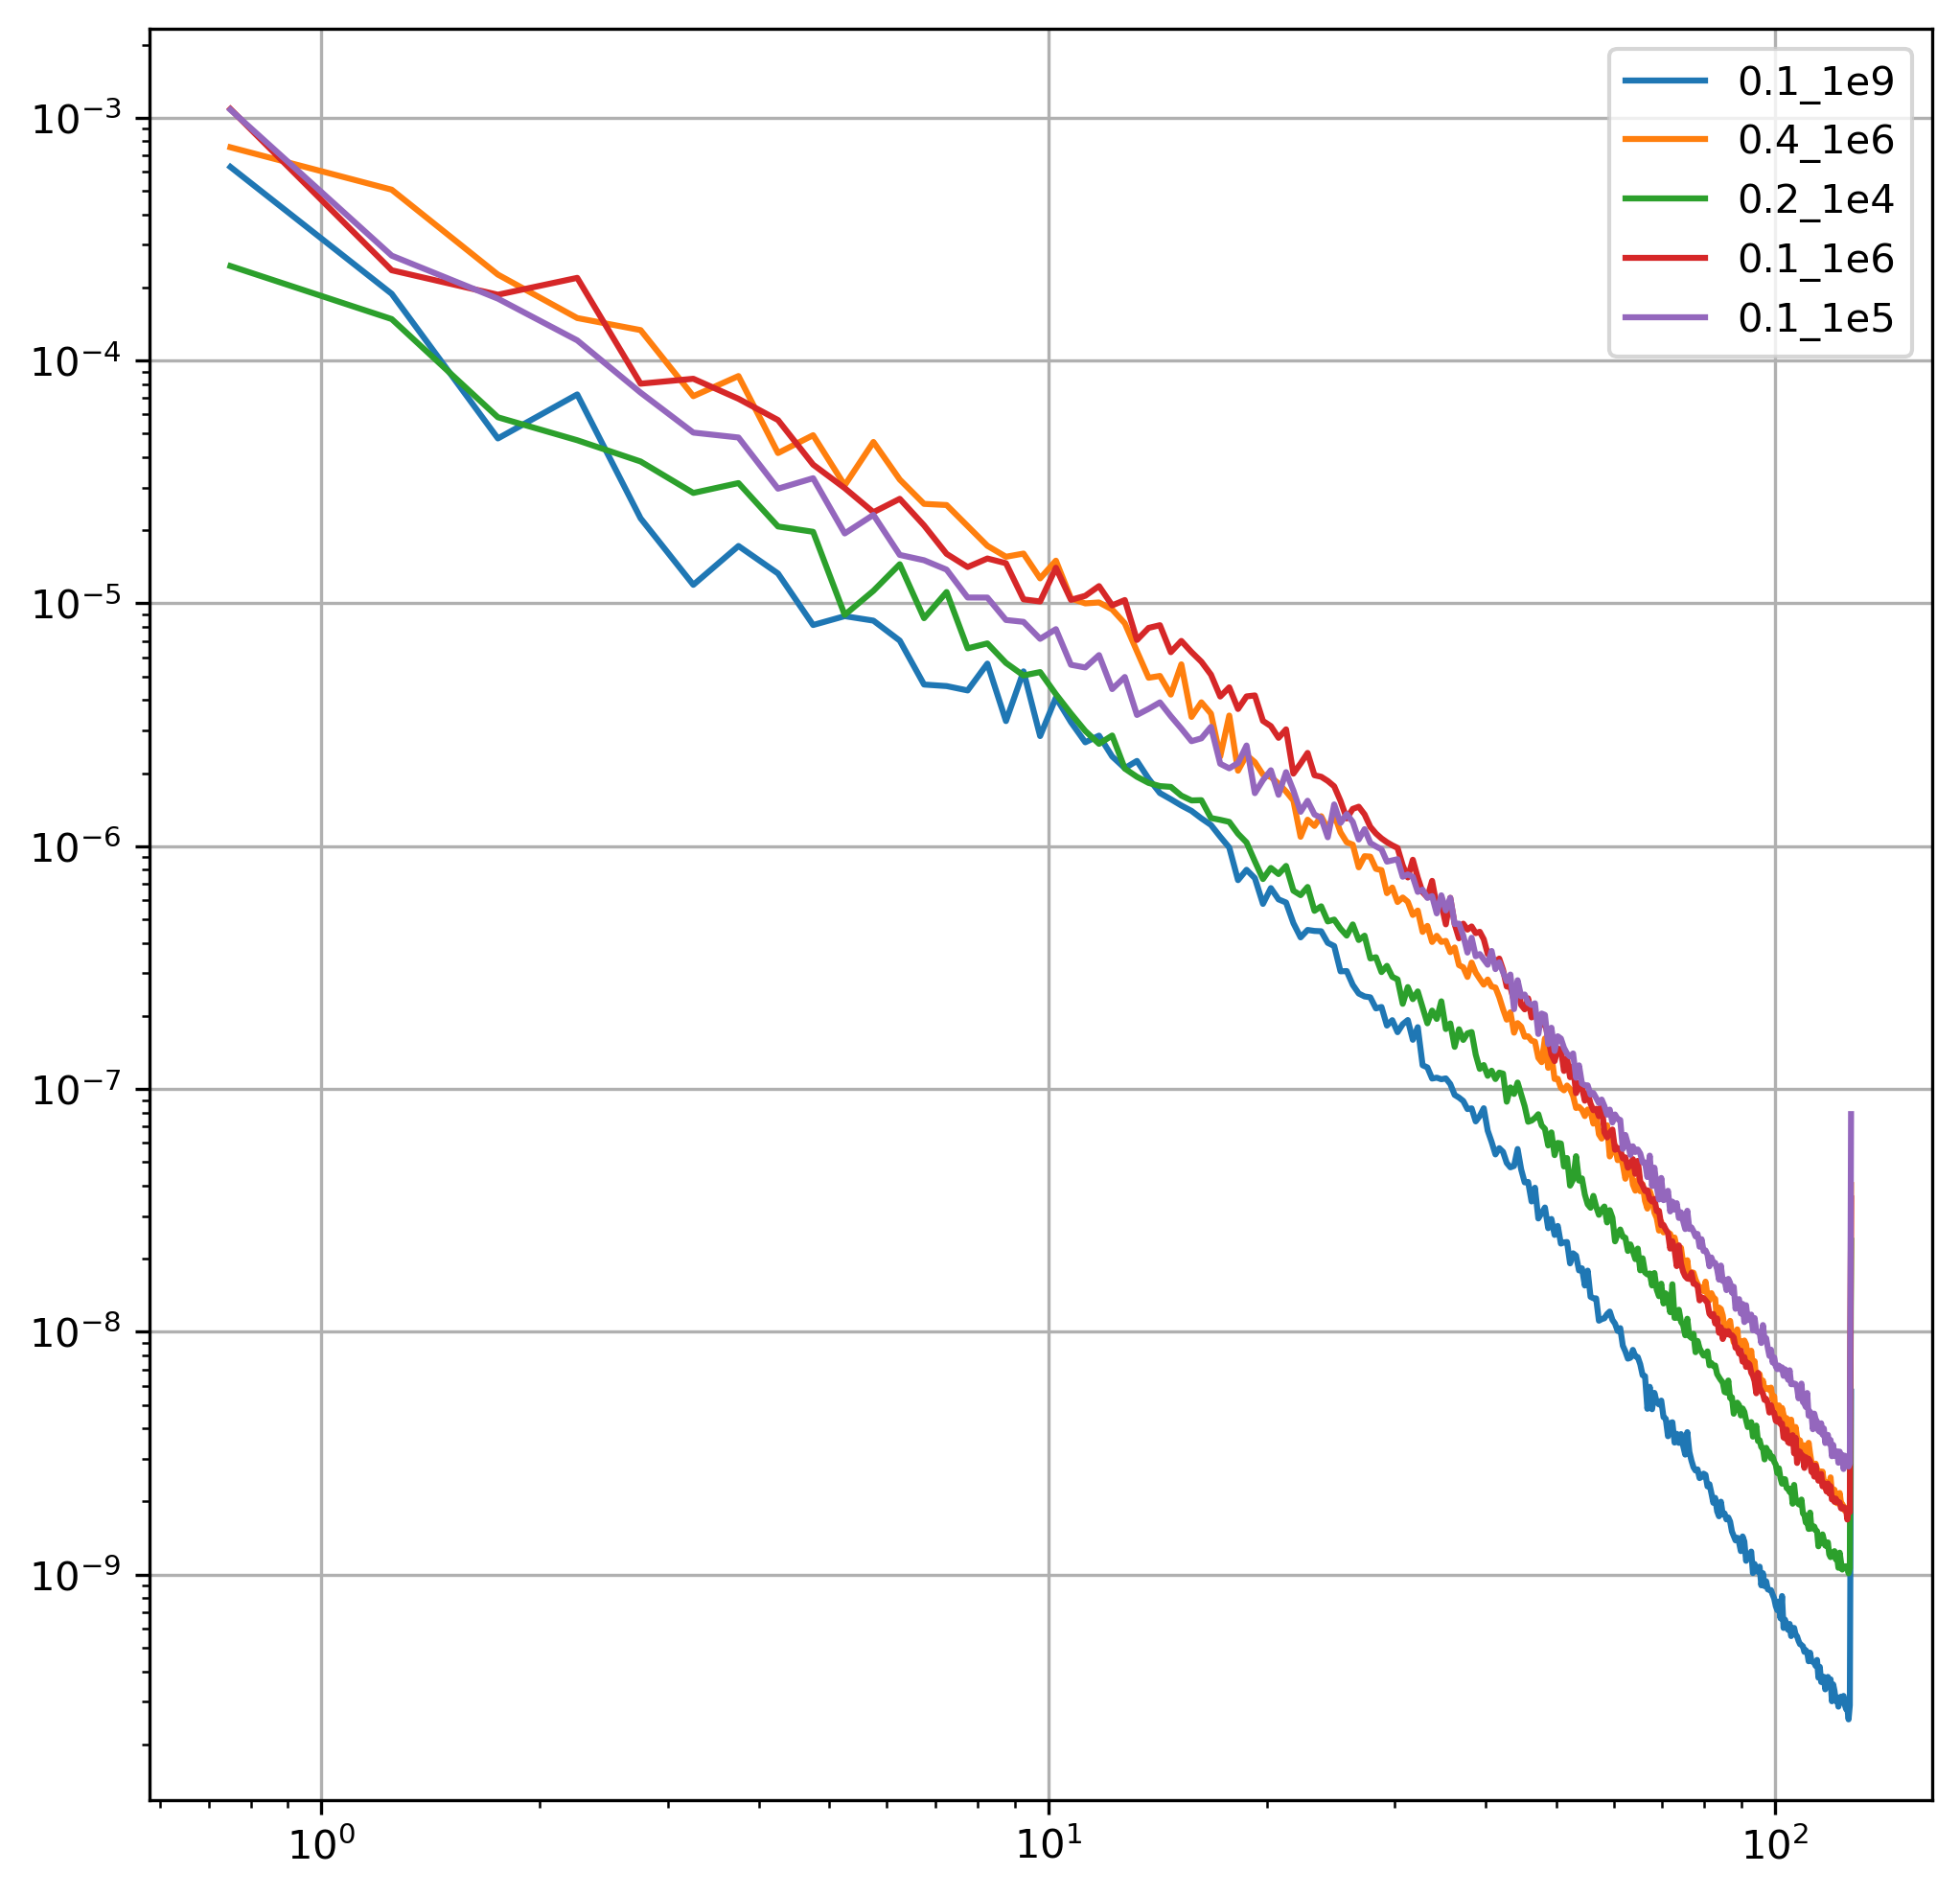

In [2]:
plt.figure(figsize=(8,8), dpi=300)

sims_to_look_at = ["0.1_1e9", "0.4_1e6", "0.2_1e4", "0.1_1e6", "0.1_1e5"]
#sims_to_look_at = ['0.2_1e5']
snapshot = 'plt20480'

for i in sims_to_look_at: 
    k, e = functions.make_ke_ps(i + '/' + snapshot)
    plt.loglog(k, e, label=i)
    
plt.legend()
plt.grid()
plt.savefig('figures/ps_diff_ic.png')


In [2]:
data_dir = r'0.2_1e5/'
data, snaps = functions.ke_ps_for_each_snapshot(data_dir)
n_snaps = len(snaps)

yt : [INFO     ] 2024-06-28 16:31:20,796 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-06-28 16:31:20,797 Parameters: domain_dimensions         = [512 512   1]
yt : [INFO     ] 2024-06-28 16:31:20,797 Parameters: domain_left_edge          = [-1. -1.  0.]
yt : [INFO     ] 2024-06-28 16:31:20,797 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2024-06-28 16:31:22,129 Parameters: current_time              = 1.0
yt : [INFO     ] 2024-06-28 16:31:22,132 Parameters: domain_dimensions         = [512 512   1]
yt : [INFO     ] 2024-06-28 16:31:22,134 Parameters: domain_left_edge          = [-1. -1.  0.]
yt : [INFO     ] 2024-06-28 16:31:22,135 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2024-06-28 16:31:22,852 Parameters: current_time              = 2.0
yt : [INFO     ] 2024-06-28 16:31:22,852 Parameters: domain_dimensions         = [512 512   1]
yt : [INFO     ] 2024-06-28 16:31:22,853 Parameters: domain_left_edge          = [-1. 

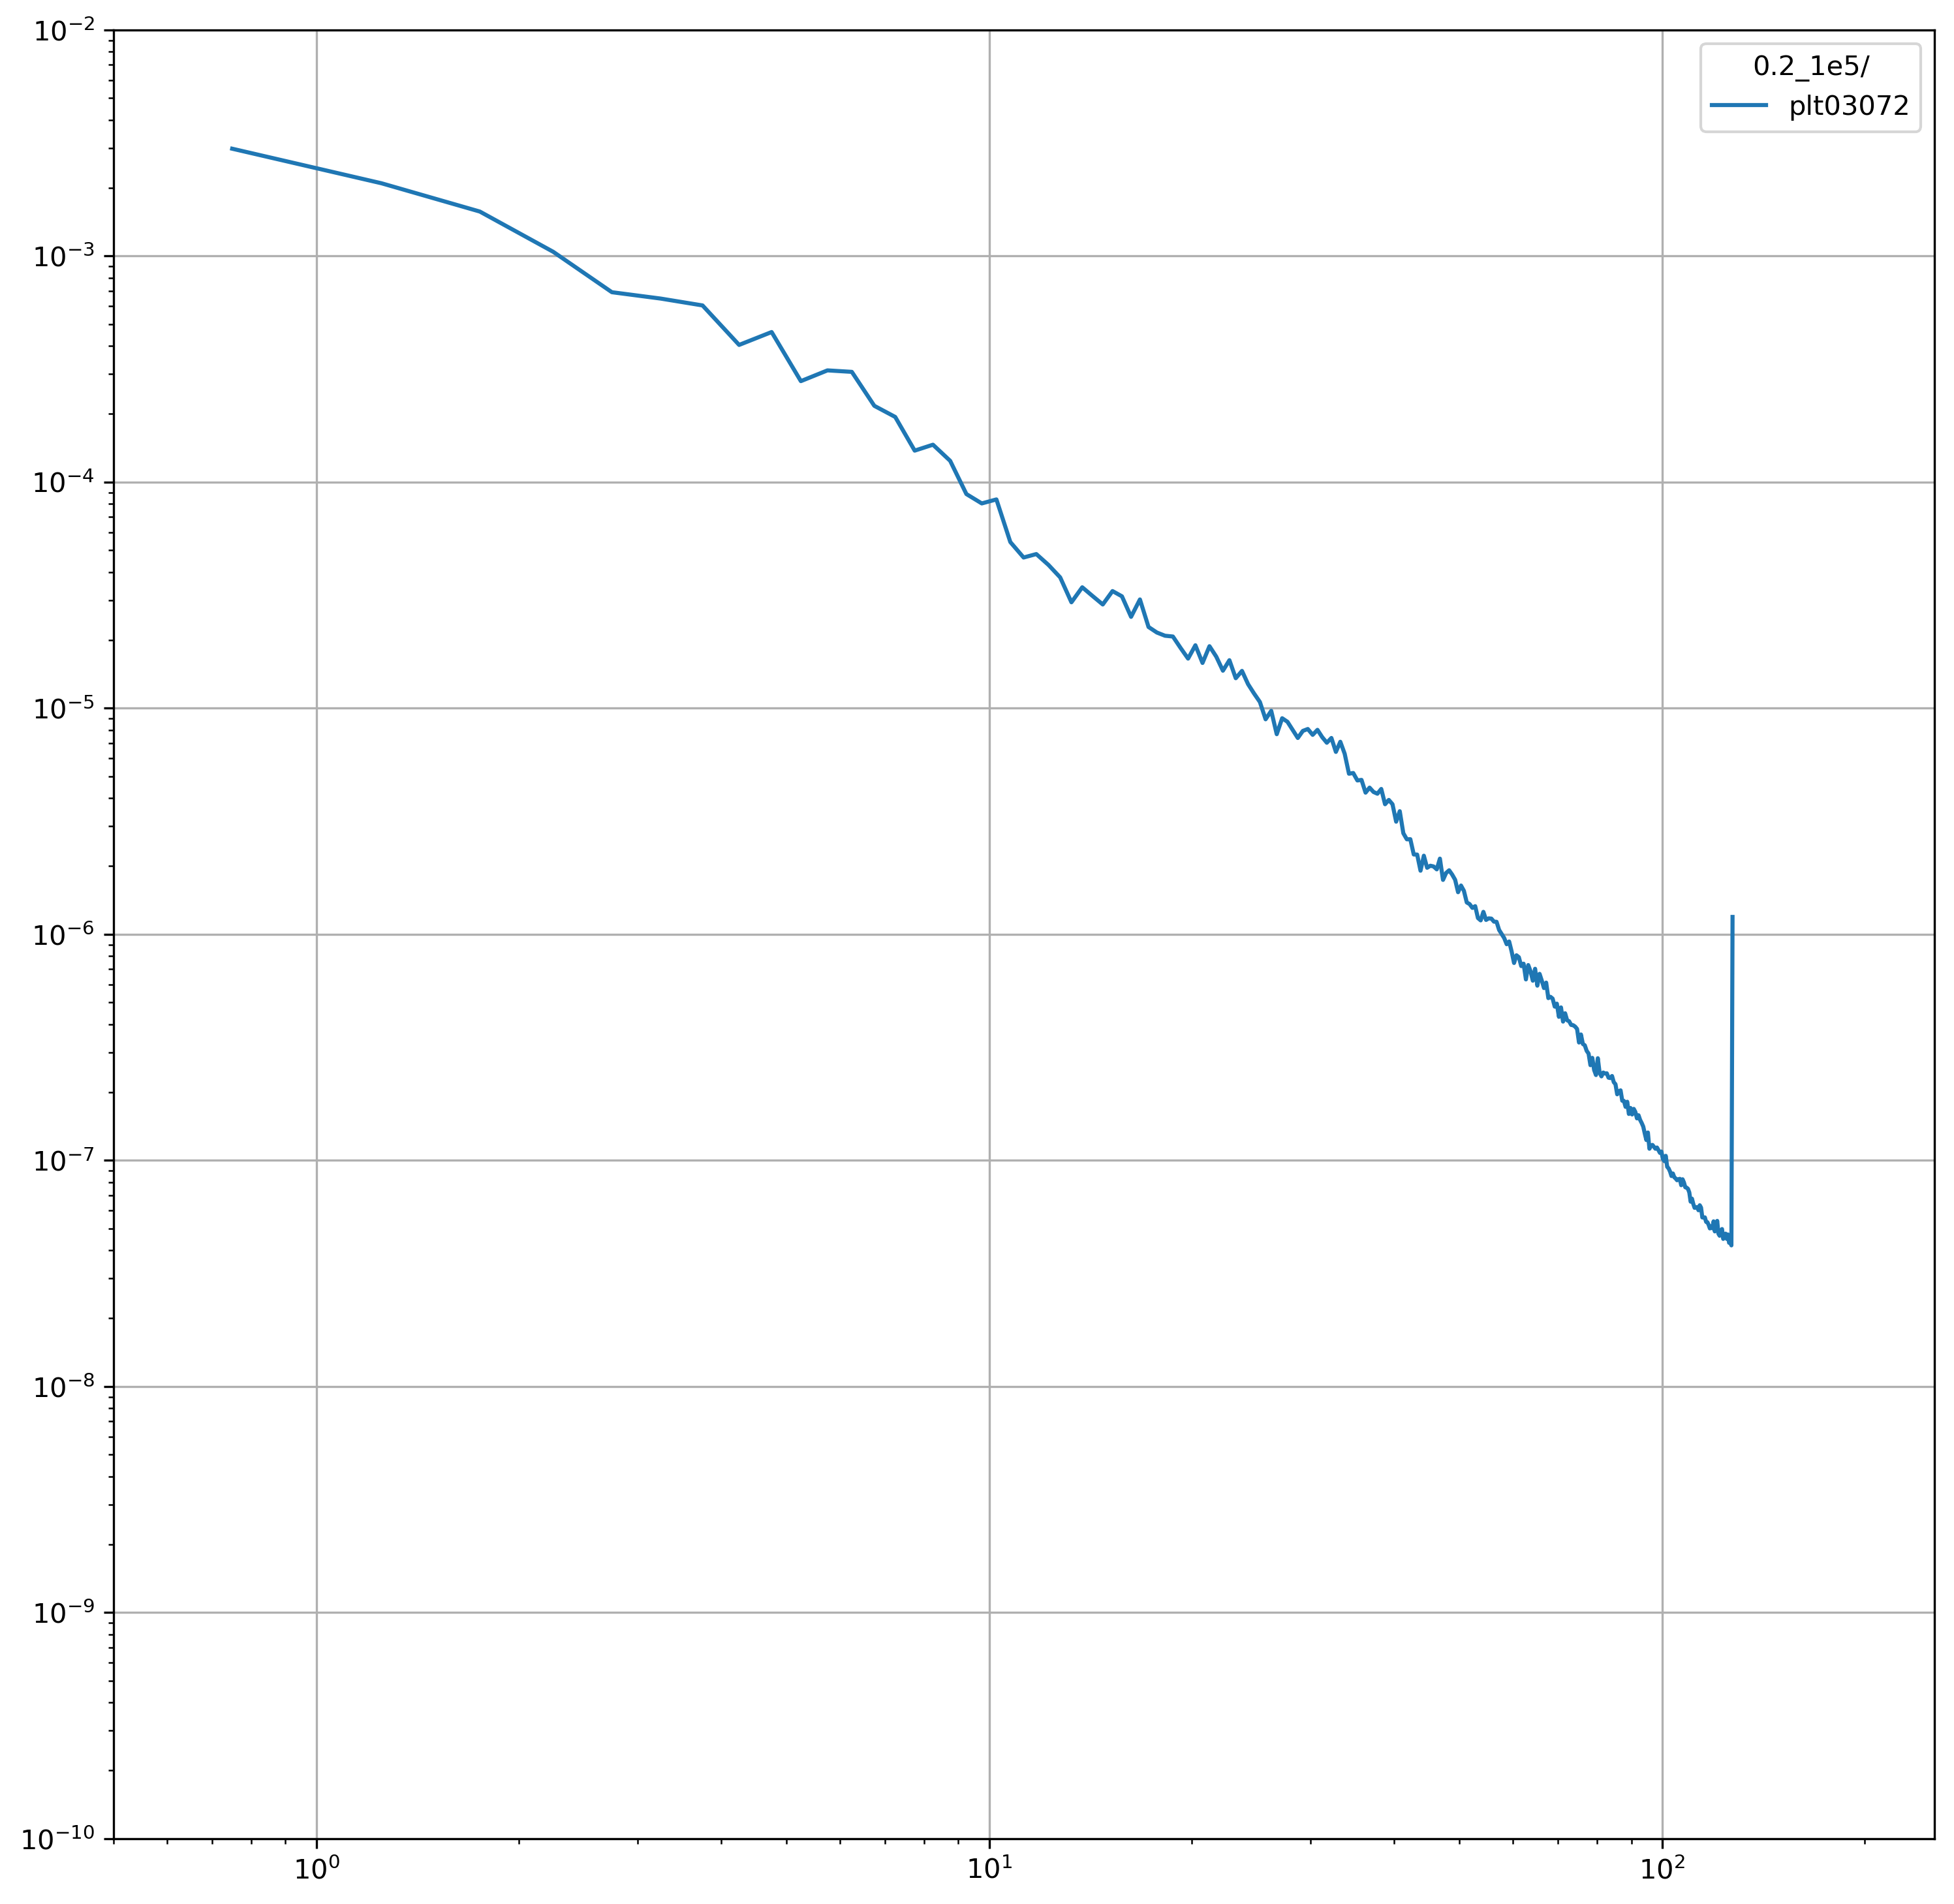

In [135]:
fig, ax = plt.subplots(figsize=(12,12), dpi=300)

line = ax.loglog(data[0, :, 1], data[1, :, 1])

def update(frame): 
    ax.cla()
    ax.grid()
    ax.plot(data[0, :, frame+start_at], data[1,:, frame+start_at], label=snaps[frame+start_at])
    ax.set_xlim(0.5, 254)
    ax.set_ylim(1e-10, 1e-2)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend(title=data_dir)

#plt.show()

start_at = 3
anim = animation.FuncAnimation(fig=fig, func=update, frames=n_snaps-start_at, interval=500)
os.makedirs(f'figures/{data_dir}', exist_ok=True)  
anim.save(filename=f'figures/{data_dir}t={start_at}..20.gif', writer='pillow')
#anim.show()
#plt.show()


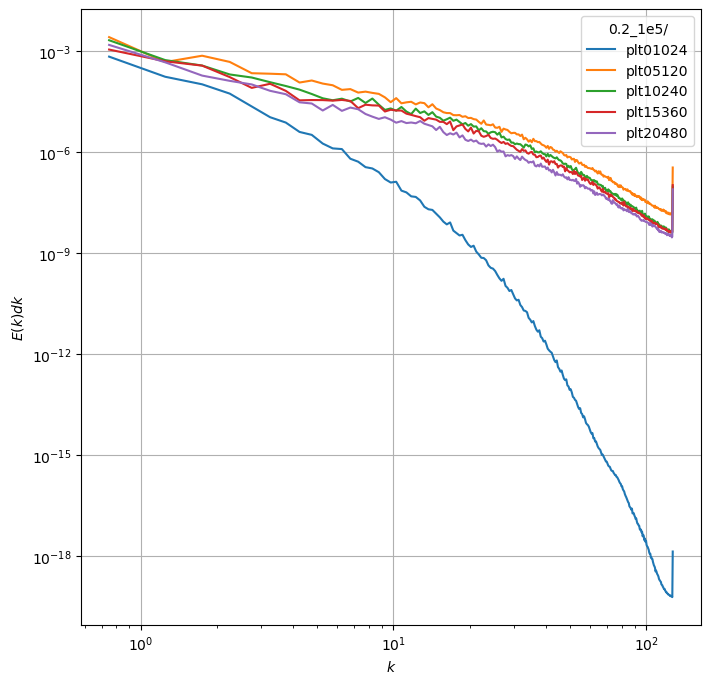

In [136]:
plt.figure(figsize=(8,8))

snaps_to_look_at = [1, 5, 10, 15, 20]

for i in snaps_to_look_at:
    plt.loglog(data[0, :, i], data[1, :, i], label=snaps[i])

plt.xlabel(r"$k$")
plt.ylabel(r"$E(k)dk$")

plt.grid()
plt.legend(title=data_dir)
os.makedirs(f'figures/{data_dir}', exist_ok=True)
plt.savefig(fname= f'figures/{data_dir}'+r'ps_overtime.png', dpi=300)
